# Categorizing(Change strings into numbers)

In [117]:
## Import modules|

In [118]:
import numpy as np
import pandas as pd
from pandas import Series
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

#ignore warnings
import warnings

%matplotlib inline

Import file(Should put 'r' in front to avoid SyntaxError)

In [119]:
df_train=pd.read_csv(r'C:\Users\user\Desktop\데이터분석\220203 프로젝트1_titanic\train.csv')
df_test=pd.read_csv(r'C:\Users\user\Desktop\데이터분석\220203 프로젝트1_titanic\test.csv')

Create 'FamilySize' column

In [120]:
df_train['FamilySize']=df_train['SibSp']+df_train['Parch']+1
df_test['FamilySize']=df_test['SibSp']+df_test['Parch']+1
#Why do I put 1? 'Because Sibsp, Parch does not include the passenger himself. SibSp' refers the number of sibling+spouse the passenger aboarded wih.'SibSp' refers the number of parents and chold the passenger aboarded wih


In [121]:
df_test.loc[df_test.Fare.isnull(), 'Fare'] = df_test['Fare'].mean()
print(df_test['Fare'].mean())

35.6271884892086


Fill the Fare data with not skewed data

In [122]:
df_train['Fare'] = df_train['Fare'].map(lambda i: np.log(i) if i > 0 else 0)
df_test['Fare'] = df_test['Fare'].map(lambda i: np.log(i) if i > 0 else 0)
#use of 'lambda' to log the outliers

## Fill null data

In [123]:
df_train['Title']=df_train['Name'].str.extract('([A-Za-z]+)\.')
df_test['Title']=df_test['Name'].str.extract('([A-Za-z]+)\.')

In [124]:
df_train['Title'].replace(['Capt', 'Col', 'Countess', 'Don', 'Dr', 'Jonkheer', 'Lady', 'Major', 'Miss', 'Mlle', 'Mme', 'Mr', 'Mrs', 'Ms', 'Rev', 'Sir'],
                         ['Mr', 'Mr', 'Mrs', 'Mr', 'Mr', 'Other', 'Miss', 'Mr', 'Miss', 'Miss', 'Miss', 'Mr', 'Mrs', 'Miss', 'Mr', 'Mr'], inplace=True)
df_test['Title'].replace(['Capt', 'Col', 'Countess', 'Don', 'Dr', 'Jonkheer', 'Lady', 'Major', 'Miss', 'Mlle', 'Mme', 'Mr', 'Mrs', 'Ms', 'Rev', 'Sir', 'Dona'],
                         ['Mr', 'Mr', 'Mrs', 'Mr', 'Mr', 'Other', 'Miss', 'Mr', 'Miss', 'Miss', 'Miss', 'Mr', 'Mrs', 'Miss', 'Mr', 'Mr', 'Mrs'], inplace=True)

In [125]:
df_all=pd.concat([df_train, df_test])

In [126]:
df_train.loc[(df_train['Age'].isnull())&(df_train['Title']=='Mr'), 'Age']=33
df_train.loc[(df_train['Age'].isnull())&(df_train['Title']=='Mrs'), 'Age']=37
df_train.loc[(df_train['Age'].isnull())&(df_train['Title']=='Master'), 'Age']=5
df_train.loc[(df_train['Age'].isnull())&(df_train['Title']=='Miss'), 'Age']=22
df_train.loc[(df_train['Age'].isnull())&(df_train['Title']=='Other'), 'Age']=45

In [127]:
df_test.loc[(df_test['Age'].isnull())&(df_test['Title']=='Mr'), 'Age']=33
df_test.loc[(df_test['Age'].isnull())&(df_test['Title']=='Mrs'), 'Age']=37
df_test.loc[(df_test['Age'].isnull())&(df_test['Title']=='Master'), 'Age']=5
df_test.loc[(df_test['Age'].isnull())&(df_test['Title']=='Miss'), 'Age']=22
df_test.loc[(df_test['Age'].isnull())&(df_test['Title']=='Other'), 'Age']=45

In [128]:
df_train['Embarked'].fillna('S', inplace=True)

## Categorizing 'Age'

Make a new column that categorize age groups by ten years.

In [129]:
df_train['Age'].max()

80.0

In [130]:
df_train['Age'].min()

0.42

The youngest passenger is 0.42 yrs old.
The oldest passenger is 80 yrs old.
Therefore, could divide people to 80 years.

In [131]:
def category_age(x):
    return min(int(x / 10), 7)

In [132]:
df_train['Age_2']=df_train['Age'].apply(category_age)

df_test['Age_2']=df_test['Age'].apply(category_age)

In [133]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Title,Age_2
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,NaN,S,2,Mr,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,C,2,Mrs,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,1,Miss,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C123,S,2,Mrs,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,NaN,S,1,Mr,3


Delete 'Age' column since I made the 'Age_2' column

In [134]:
df_train.drop(['Age'], axis=1, inplace=True)
#'axis=1' means deleting the column(세로줄)

In [135]:
df_test.drop(['Age'], axis=1, inplace=True)

In [136]:
df_test.head()

,PassengerId,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Title,Age_2
0,892,3,"Kelly, Mr. James",male,0,0,330911,2.057860,NaN,Q,1,Mr,3
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,1,0,363272,1.945910,NaN,S,2,Mrs,4
2,894,2,"Myles, Mr. Thomas Francis",male,0,0,240276,2.270836,NaN,Q,1,Mr,6
3,895,3,"Wirz, Mr. Albert",male,0,0,315154,2.159003,NaN,S,1,Mr,2
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,1,1,3101298,2.508582,NaN,S,3,Mrs,2


## Changing 'Title' into number

In [137]:
df_train['Title']=df_train['Title'].map({'Master':0, 'Miss':1, 'Mr':2, 'Mrs':3, 'Other':4})
df_test['Title']=df_test['Title'].map({'Master':0, 'Miss':1, 'Mr':2, 'Mrs':3, 'Other':4})

## Changing 'Embarked' into number

What kinds do 'Embarked' have?

In [138]:
df_train['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [139]:
df_train['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [140]:
df_train['Embarked']=df_train['Embarked'].map({'C':0, 'Q':1, 'S':2})
df_test['Embarked']=df_test['Embarked'].map({'C':0, 'Q':1, 'S':2})


In [141]:
df_train['Embarked'].isnull().any()

False

## Changing 'Sex' into number

In [142]:
df_train['Sex']=df_train['Sex'].map({'female':0, 'male':1})
df_test['Sex']=df_test['Sex'].map({'female':0, 'male':1})


## Relationship between features

In [146]:
heatmap_data=df_train[['Survived', 'Pclass', 'Sex', 'Embarked', 'FamilySize', 'Title', 'Age_2', 'Fare']]


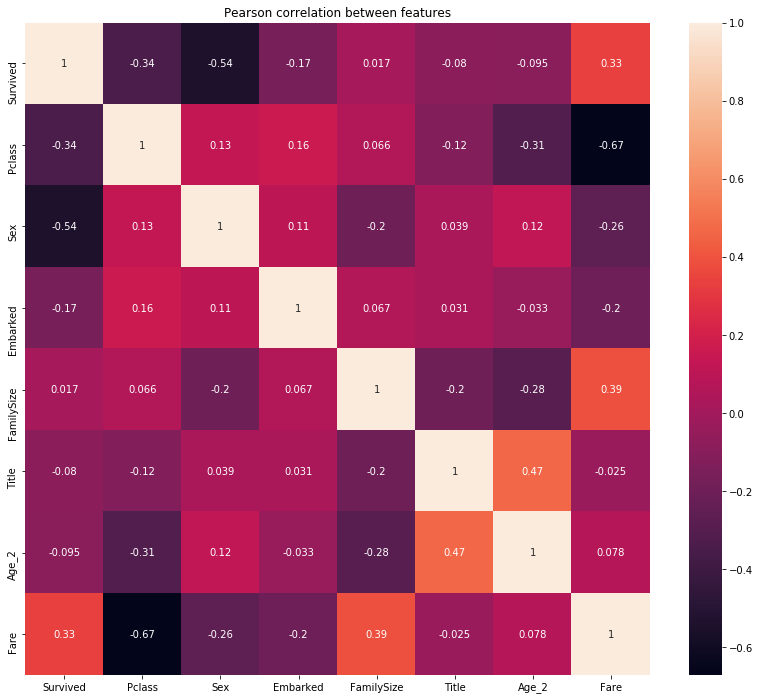

In [154]:
plt.figure(figsize=(14, 12))
plt.title('Pearson correlation between features')
sns.heatmap(heatmap_data.astype(float).corr(), annot=True)

'Sex'(34%), 'Pclass'(54%) have negative affect on Survival rate. 